In [26]:
import pandas as pd
from tqdm import tqdm

df = pd.read_excel("preprocessed.xlsx")
columns_ignore = ['name', 'released', 'score', 'votes', 'gross', 'same_year']

In [27]:
wonka = df.iloc[-1]
# remove wonka from df
df = df.iloc[:-1]
wonka = wonka.drop(columns_ignore)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)

X = df.drop(
    columns_ignore,
    axis=1,
)
X = poly.fit_transform(X)
y = df["score"]

X, X_test_final, y, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


def plot_predictions(y_test, y_pred):
    plt.scatter(y_test, y_pred, color="blue")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Predictions vs. Truth")
    plt.show()


def evaluate(model, X, y):
    pred = model.predict(X)
    print("Mean squared error: %.2f" % mean_squared_error(y, pred))
    print("Mean absolute error: %.2f" % mean_absolute_error(y, pred))
    print("Coefficient of determination: %.2f" % r2_score(y, pred))
    plot_predictions(y, pred)

In [30]:
models = []

## LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    models.append(model)

Mean squared error: 0.59
Mean absolute error: 0.58
Coefficient of determination: 0.37


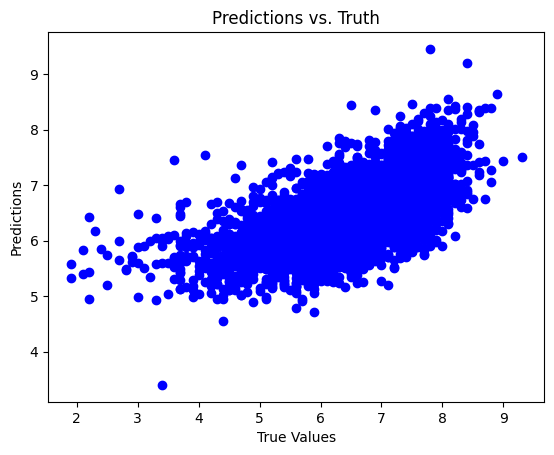

Mean squared error: 0.60
Mean absolute error: 0.59
Coefficient of determination: 0.36


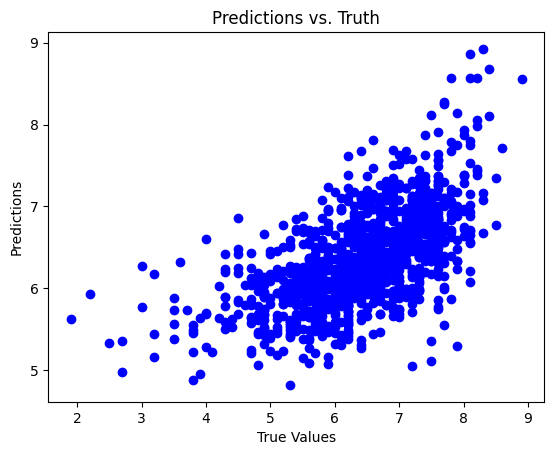

In [32]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

## DecisionTree

In [33]:
from sklearn.tree import DecisionTreeRegressor

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    models.append(model)

Mean squared error: 0.00
Mean absolute error: 0.00
Coefficient of determination: 1.00


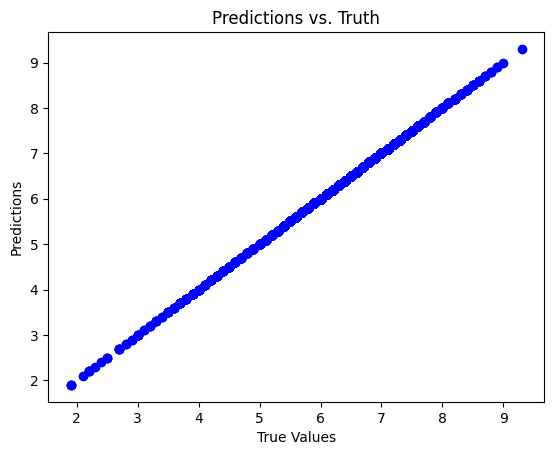

Mean squared error: 1.17
Mean absolute error: 0.83
Coefficient of determination: -0.28


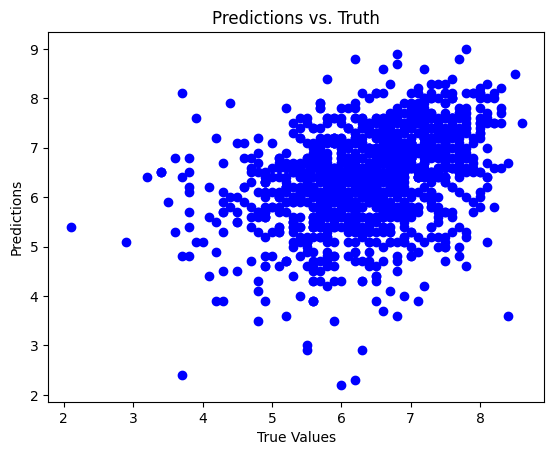

In [34]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

## Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
import random

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = RandomForestRegressor(n_estimators=random.randint(1, 100))
    model.fit(X_train, y_train)
    models.append(model)

Mean squared error: 0.09
Mean absolute error: 0.22
Coefficient of determination: 0.91


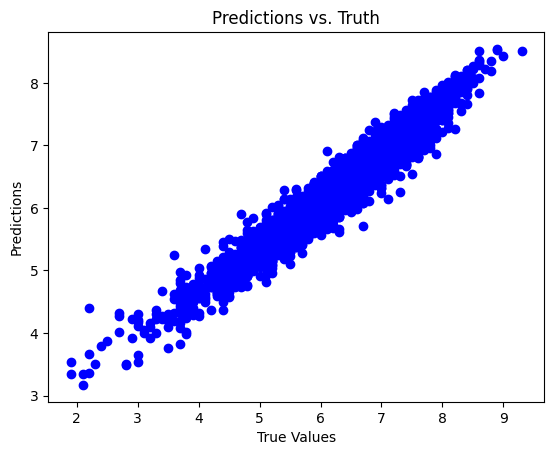

Mean squared error: 0.65
Mean absolute error: 0.62
Coefficient of determination: 0.34


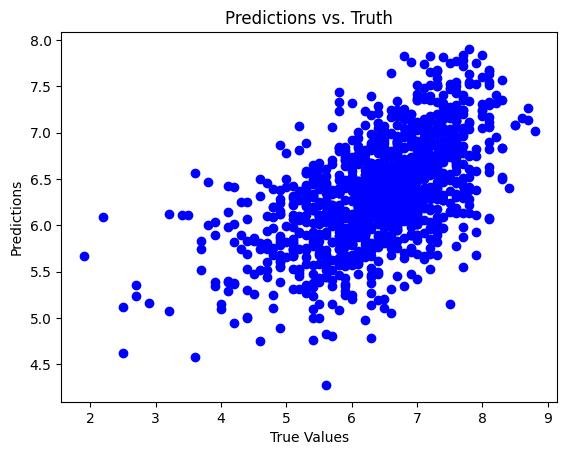

In [36]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_models = []

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    gradient_boosting_models.append(model)

Mean squared error: 0.53
Mean absolute error: 0.56
Coefficient of determination: 0.43


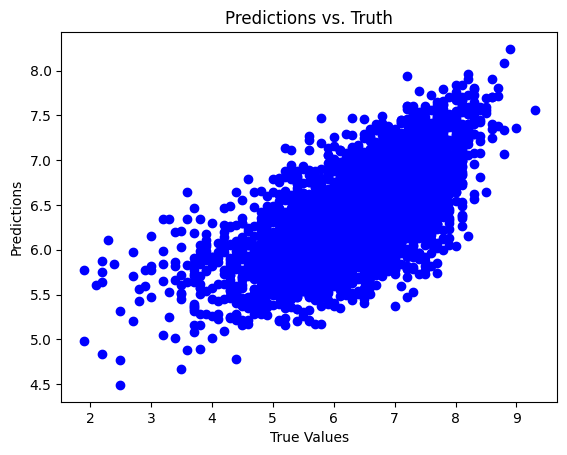

Mean squared error: 0.61
Mean absolute error: 0.60
Coefficient of determination: 0.36


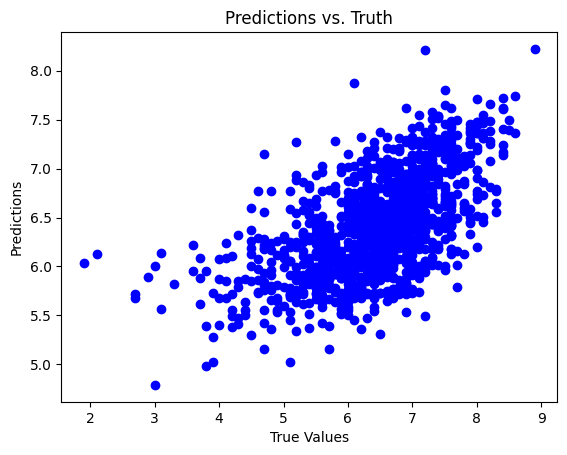

In [38]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

## MLP

In [39]:
from sklearn.neural_network import MLPRegressor

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = MLPRegressor()
    model.fit(X_train, y_train)
    models.append(model)

Mean squared error: 300081.71
Mean absolute error: 428.67
Coefficient of determination: -320759.21


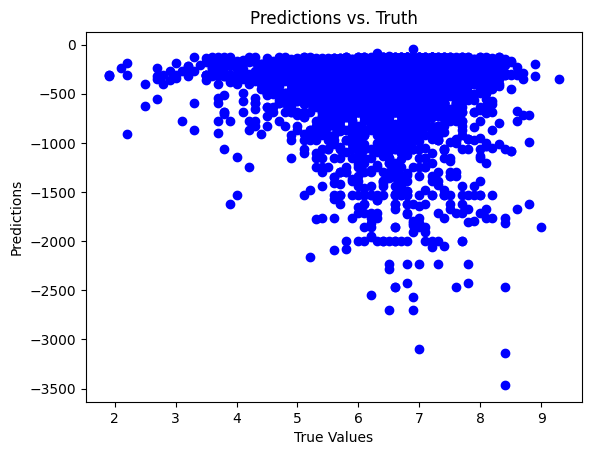

Mean squared error: 292849.40
Mean absolute error: 419.68
Coefficient of determination: -321213.70


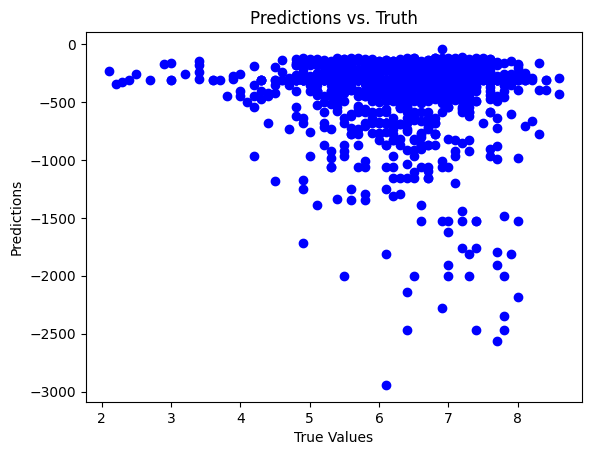

In [40]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

## KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    models.append(model)

Mean squared error: 0.58
Mean absolute error: 0.59
Coefficient of determination: 0.38


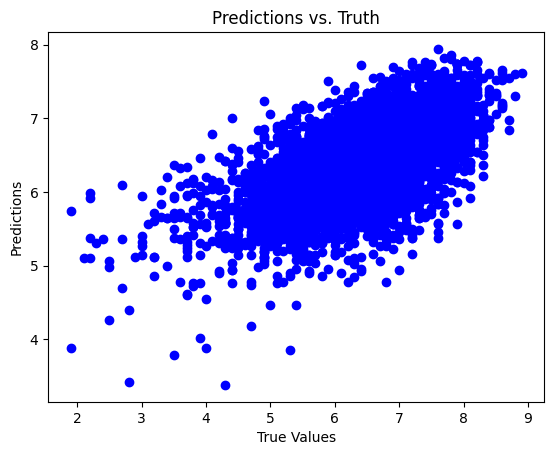

Mean squared error: 0.87
Mean absolute error: 0.72
Coefficient of determination: 0.07


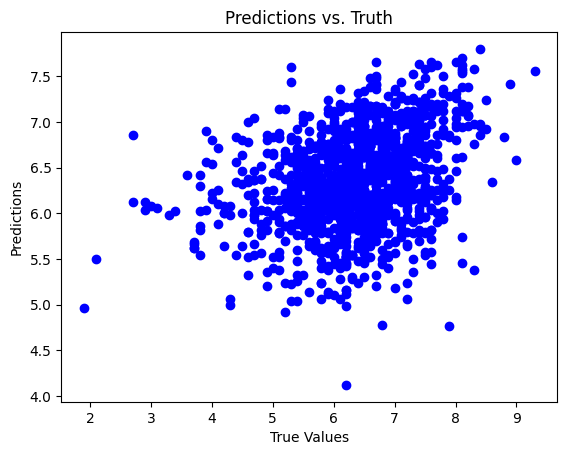

In [42]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

## Clustering

In [43]:
from sklearn.cluster import KMeans

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = KMeans()
    model.fit(X_train, y_train)

/Users/kalebsmith/ownCloud/school/cs-201r/final-project/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kalebsmith/ownCloud/school/cs-201r/final-project/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kalebsmith/ownCloud/school/cs-201r/final-project/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kalebsmith/ownCloud/scho

Mean squared error: 22.44
Mean absolute error: 3.97
Coefficient of determination: -22.91


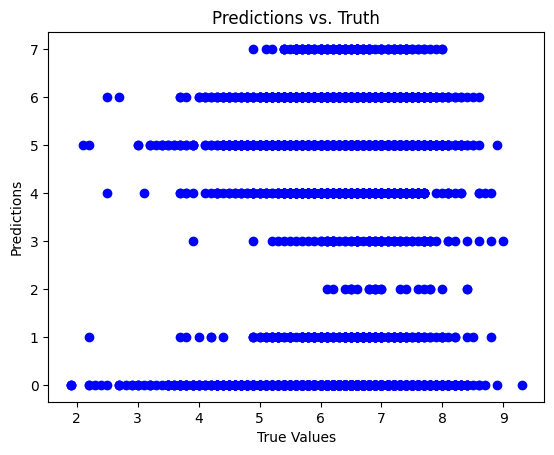

Mean squared error: 22.10
Mean absolute error: 3.90
Coefficient of determination: -23.49


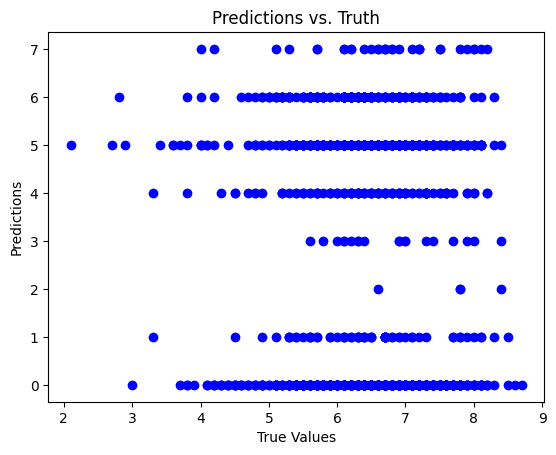

In [44]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

# Ensemble

### Voting Regressor

In [45]:
# Ensemble
from sklearn.ensemble import VotingRegressor

def weight(model):
    return 1/mean_squared_error(model.predict(X_test), y_test)

weights = [weight(model) for model in models]
ensemble = VotingRegressor(estimators=[(str(i), model) for i, model in enumerate(models)], weights=weights)
ensemble.fit(X, y)

VotingRegressor(estimators=[('0', LinearRegression()),
                            ('1', LinearRegression()),
                            ('2', LinearRegression()),
                            ('3', LinearRegression()),
                            ('4', LinearRegression()),
                            ('5', DecisionTreeRegressor()),
                            ('6', DecisionTreeRegressor()),
                            ('7', DecisionTreeRegressor()),
                            ('8', DecisionTreeRegressor()),
                            ('9', DecisionTreeRegressor()),
                            ('10', RandomForestRegressor(n_estimators=97)),
                            (...
                         3.4660489358621693, 3.416388389416902,
                         3.458937756458418, 4.4395816334099845,
                         4.5412598799432935, 4.908548761020311,
                         4.889816853142093, 4.86098627529941, 4.98951731005109,
                         1.605392640557637e-05, 0.005630028783219121,
                         5.543769813357964e-09, 3.142516956328172e-05,
                         3.328506854199301e-06, 1.5756169784378724,
                         1.5385952175781865, 1.6269962305881813,
                         1.5812158426995382, 1.5926914489633535])

Mean squared error: 0.09
Mean absolute error: 0.23
Coefficient of determination: 0.90


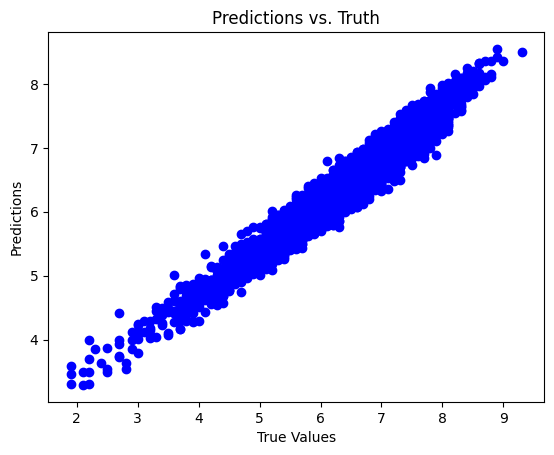

Mean squared error: 0.62
Mean absolute error: 0.61
Coefficient of determination: 0.32


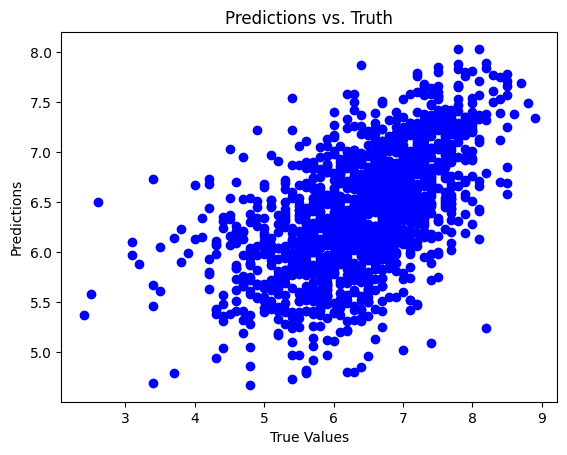

In [46]:
evaluate(ensemble, X, y)
evaluate(ensemble, X_test_final, y_test_final)

### Stacking 

In [48]:
# Ensemble
from sklearn.ensemble import StackingRegressor

ensemble = StackingRegressor(estimators=[(str(i), model) for i, model in enumerate(models)])
ensemble.fit(X, y)

/Users/kalebsmith/ownCloud/school/cs-201r/final-project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean squared error: 0.26
Mean absolute error: 0.37
Coefficient of determination: 0.72


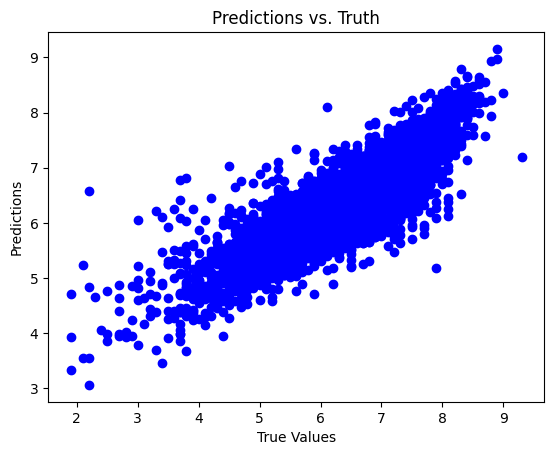

Mean squared error: 0.52
Mean absolute error: 0.55
Coefficient of determination: 0.42


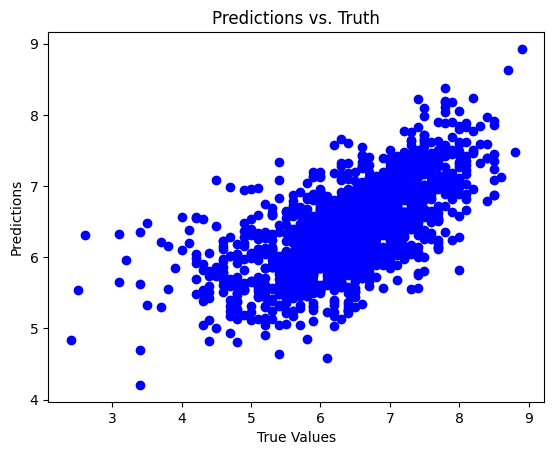

In [ ]:
evaluate(model, X, y)
evaluate(model, X_test_final, y_test_final)

In [ ]:
print("Wonka Score:", stack.predict(poly.fit_transform(wonka.values.reshape(1, -1)))[0])

Wonka Score: 6.832082377058692
